In [1]:
# Load Python Libraries
import swat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
%matplotlib inline

In [2]:
# Create CAS Connection
conn = swat.CAS(host, portnum, protocol='http')
conn.sessionProp.setSessOpt(messageLevel='NONE'); # Suppress CAS Messages

In [3]:
# Load CAS Action Sets
conn.loadactionset('pca')
conn.loadactionset('tsne');

In [4]:
# Read in Data
digits = pd.read_csv('/Users/anviol/Desktop/Content/Datasets/Digits/digits.csv')
mnist = pd.read_csv('/Users/anviol/Desktop/Content/Datasets/mnist/small_mnist.csv')

display(digits.shape)
display(mnist.shape)

(1083, 66)

(5921, 786)

In [5]:
# Preview Data
pd.set_option('display.max_columns', None) # Show All Columns in Preview

display(digits.head(n=5))
display(mnist.head(n=5))

,ID,Label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0,0,0,0,5,13,9,1,0,0,0,0,13,15,10,15,5,0,0,3,15,2,0,11,8,0,0,4,12,0,0,8,8,0,0,5,8,0,0,9,8,0,0,4,11,0,1,12,7,0,0,2,14,5,10,12,0,0,0,0,6,13,10,0,0,0
1,1,1,0,0,0,12,13,5,0,0,0,0,0,11,16,9,0,0,0,0,3,15,16,6,0,0,0,7,15,16,16,2,0,0,0,0,1,16,16,3,0,0,0,0,1,16,16,6,0,0,0,0,1,16,16,6,0,0,0,0,0,11,16,10,0,0
2,2,2,0,0,0,4,15,12,0,0,0,0,3,16,15,14,0,0,0,0,8,13,8,16,0,0,0,0,1,6,15,11,0,0,0,1,8,13,15,1,0,0,0,9,16,16,5,0,0,0,0,3,13,16,16,11,5,0,0,0,0,3,11,16,9,0
3,3,3,0,0,7,15,13,1,0,0,0,8,13,6,15,4,0,0,0,2,1,13,13,0,0,0,0,0,2,15,11,1,0,0,0,0,0,1,12,12,1,0,0,0,0,0,1,10,8,0,0,0,8,4,5,14,9,0,0,0,7,13,13,9,0,0
4,4,4,0,0,0,1,11,0,0,0,0,0,0,7,8,0,0,0,0,0,1,13,6,2,2,0,0,0,7,15,0,9,8,0,0,5,16,10,0,16,6,0,0,4,15,16,13,16,1,0,0,0,0,3,15,10,0,0,0,0,0,2,16,4,0,0


,ID,Label,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,145,255,211,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,237,253,252,71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,175,253,252,71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,253,252,71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,191,253,252,71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,221,253,252,124,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,125,253,252,252,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,253,252,252,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,253,253,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,253,252,252,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,253,252,252,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [6]:
# View Label Distribution
# Digits Labels: 0-5, MNIST Labels: 0-10
display(pd.crosstab(index=digits['Label'], columns='count'))
display(pd.crosstab(index=mnist['Label'], columns='count'))

col_0,count
Label,
0,178
1,182
2,177
3,183
4,181
5,182


col_0,count
Label,
0,594
1,666
2,562
3,599
4,596
5,544
6,574
7,616
8,567


In [7]:
# Upload Digits and MNIST Data to CAS Server
digits_cas = conn.upload_frame(digits, casout=dict(name='digits_df', replace=True))
mnist_cas = conn.upload_frame(mnist, casout=dict(name='mnist_df', replace=True));

In [8]:
# Perform PCA: Digits
pca_digits = conn.eig(table='digits_df',
                      n=30,
                      inputs=list(digits.drop(['ID', 'Label'], axis=1)),
                      output={'casOut':{'name':'pca_digits','replace':'TRUE'},
                              'copyVars':['ID','Label']})

In [9]:
# Perform PCA: MNIST
pca_mnist = conn.eig(table='mnist_df',
                     n=30,
                     output={'casOut':{'name':'pca_mnist','replace':'TRUE'},
                             'copyVars':['ID','Label']})

In [10]:
# Display Eigenvalues & Explained Variance Percentage of Top 5 Components
display(pca_digits.Eigenvalues[0:5])
display(pca_mnist.Eigenvalues[0:5])

,Number,Eigenvalue,Difference,Proportion,Cumulative
0,1,9.377356,3.124046,0.153727,0.153727
1,2,6.253310,1.367689,0.102513,0.256240
2,3,4.885621,0.609376,0.080092,0.336333
3,4,4.276246,1.321434,0.070102,0.406435
4,5,2.954811,0.232939,0.048440,0.454875


,Number,Eigenvalue,Difference,Proportion,Cumulative
0,1,40.903592,11.523326,0.060868,0.060868
1,2,29.380266,2.290597,0.043721,0.104589
2,3,27.089669,6.680408,0.040312,0.144901
3,4,20.409261,2.041808,0.030371,0.175272
4,5,18.367453,2.462816,0.027333,0.202605


In [11]:
# Move Scored Dataframes to Pandas Dataframes for Plotting
pca_digits_out = conn.fetch(table='pca_digits', maxrows=len(digits_cas), to=len(digits_cas))
pca_digits_out = pd.DataFrame(pca_digits_out['Fetch'])
pca_digits_out['Label'] = pca_digits_out['Label'].astype(int)  # Convert Label to Int for Plot

pca_mnist_out = conn.fetch(table='pca_mnist', maxrows=len(mnist_cas), to=len(mnist_cas))
pca_mnist_out = pd.DataFrame(pca_mnist_out['Fetch'])
pca_mnist_out['Label'] = pca_mnist_out['Label'].astype(int)

In [12]:
# Preview of Output Dataframe (Digits)
display(pca_digits_out.head(n=5))

,ID,Label,Score1,Score2,Score3,Score4,Score5,Score6,Score7,Score8,Score9,Score10,Score11,Score12,Score13,Score14,Score15,Score16,Score17,Score18,Score19,Score20,Score21,Score22,Score23,Score24,Score25,Score26,Score27,Score28,Score29,Score30
0,0.0,0,-2.694161,-4.133599,1.069314,0.612860,-0.026902,-0.693911,-1.619352,-0.265810,0.485604,0.148650,0.310550,-0.530693,-0.922057,-0.128856,-0.431257,-0.132923,0.101073,0.475356,0.598982,-0.584060,-0.898966,-0.452475,0.389237,0.526211,0.429106,0.816603,0.529570,0.159251,-0.574646,0.107263
1,1.0,1,-0.033979,4.504417,-1.368602,-0.309794,0.660595,0.993263,-0.150133,1.353884,-0.301802,0.689120,0.188363,0.393760,0.558787,0.495491,-0.455892,-0.059409,0.174992,0.302310,-0.425623,0.055839,0.303564,0.325163,-0.315262,0.535201,0.566413,0.664481,0.241612,-0.516793,0.767975,-1.189894
2,2.0,2,-0.759499,2.655384,-2.218241,1.799963,2.031916,-0.725854,-2.422912,-0.786557,-1.778105,-0.234948,1.065179,1.217111,-0.170564,0.649056,0.755175,0.310362,0.356372,-1.334406,0.318660,0.450987,0.771902,0.022431,-0.492344,0.177652,-2.110132,-1.300389,0.600053,-0.019769,-0.530838,-0.217700
3,3.0,3,2.822545,-1.038666,-2.408428,-0.298934,0.451191,0.066010,2.360321,1.533825,0.626615,0.229254,-0.275431,0.188791,-0.306219,-0.349977,-0.080572,0.079917,0.208912,0.495680,0.362344,0.042698,-1.075882,-0.814021,0.026232,-0.675053,0.879935,0.197166,0.741803,-0.099646,0.012991,0.447340
4,4.0,4,-4.457544,1.526033,-1.764325,0.521115,1.049303,-0.327115,2.531619,-0.472236,0.708806,-1.422000,0.989039,-0.160593,-1.188308,0.521026,-0.418123,-0.410699,0.218256,1.320873,-0.624422,0.664845,-1.167428,-0.035989,0.091261,-1.952377,-0.290080,-0.592151,-0.342694,-0.436806,0.938557,0.416953


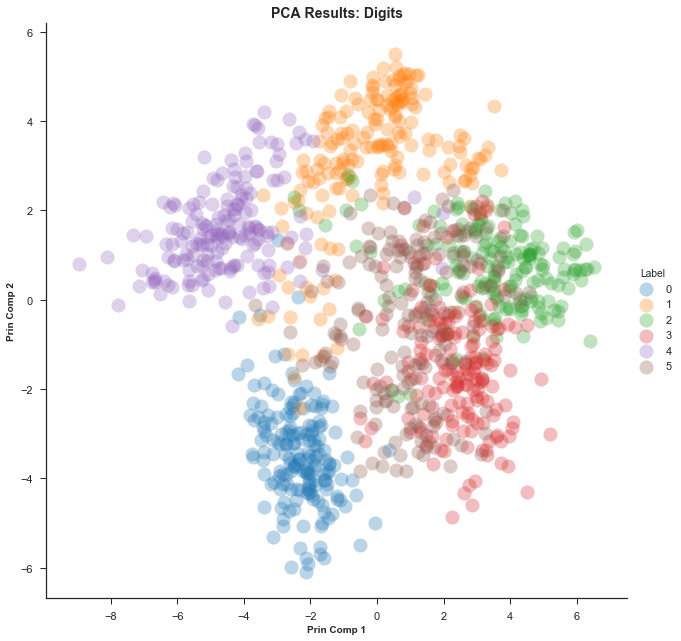

In [13]:
# Plot Digits PCA

# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='Score1',
           y='Score2',
           data=pca_digits_out,
           fit_reg=False,
           legend=True,
           size=9,
           hue='Label',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('PCA Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Prin Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Prin Comp 2', weight='bold').set_fontsize('10')

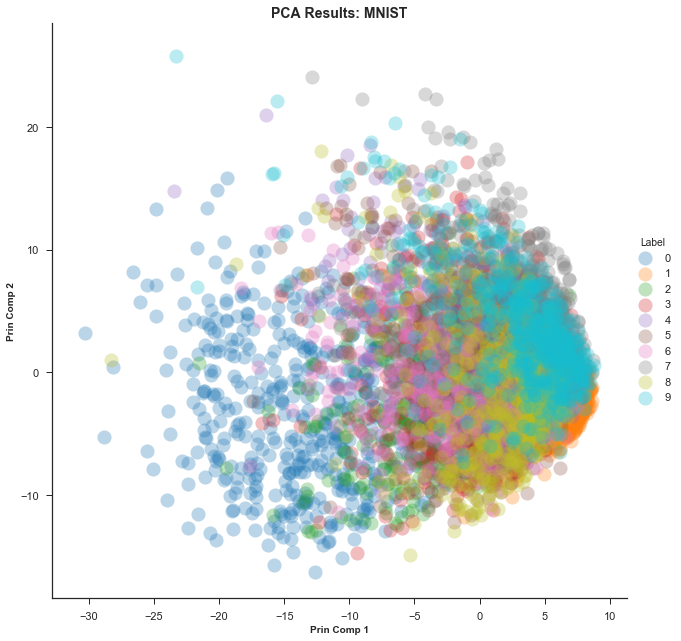

In [14]:
# Plot MNIST PCA
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='Score1',
           y='Score2',
           data=pca_mnist_out,
           fit_reg=False,
           legend=True,
           size=9,
           hue='Label',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('PCA Results: MNIST', weight='bold').set_fontsize('14')
plt.xlabel('Prin Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Prin Comp 2', weight='bold').set_fontsize('10')

In [15]:
# Perform t-SNE: Digits
tsne_digits = conn.tSne(table='digits_df',
                        inputs = list(digits.drop(['ID', 'Label'], axis=1)),
                        nDimensions = 2,
                        maxIters = 1000,
                        perplexity = 100,
                        learningRate = 1000,
                        seed = 24680,
                        output= {'casout':{'name':'tsne_digits','replace':'TRUE'},
                                 'copyVars':['ID','Label']})

In [16]:
# Move Scored Dataframes to Pandas Dataframes for Plotting
tsne_digits_out = conn.fetch(table='tsne_digits', maxrows=len(mnist_cas), to=len(mnist_cas))
tsne_digits_out = pd.DataFrame(tsne_digits_out['Fetch'])

tsne_digits_out['Label'] = tsne_digits_out['Label'].astype(int)

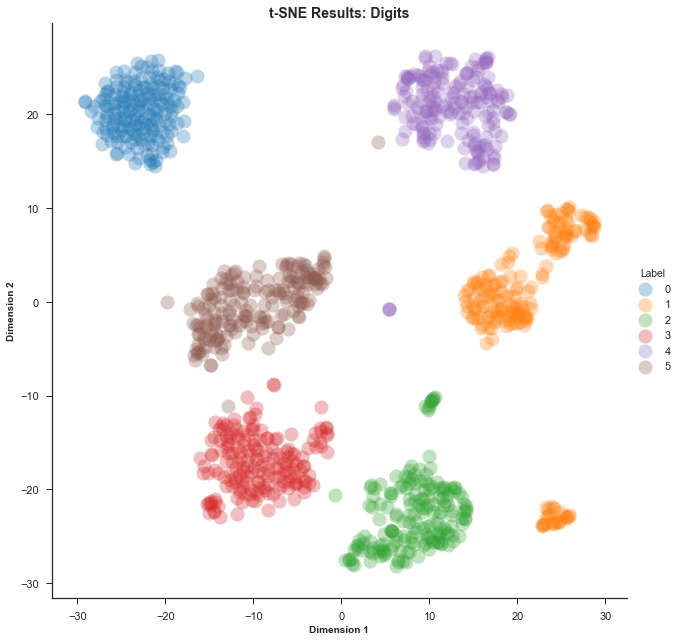

In [17]:
# Plot Digits t-SNE
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='_DIM_1_',
           y='_DIM_2_',
           data=tsne_digits_out,
           fit_reg=False,
           legend=True,
           size=9,
           hue='Label',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('t-SNE Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')

In [18]:
# Perform t-SNE: MNIST
tsne_MNIST = conn.tSne(table='mnist_df',
                       inputs = list(mnist.drop(['ID', 'Label'], axis=1)),
                       nDimensions = 2,
                       maxIters = 1000,
                       perplexity = 100,
                       learningRate = 1000,
                       seed = 24680,
                       output= {'casout':{'name':'tsne_MNIST','replace':'TRUE'},
                                'copyVars':['ID','Label']})

In [19]:
# Pandas Plotting Dataframe
tsne_MNIST_out = conn.fetch(table='tsne_MNIST', maxrows=len(mnist_cas), to=len(mnist_cas))
tsne_MNIST_out = pd.DataFrame(tsne_MNIST_out['Fetch'])

tsne_MNIST_out['Label'] = tsne_MNIST_out['Label'].astype(int)

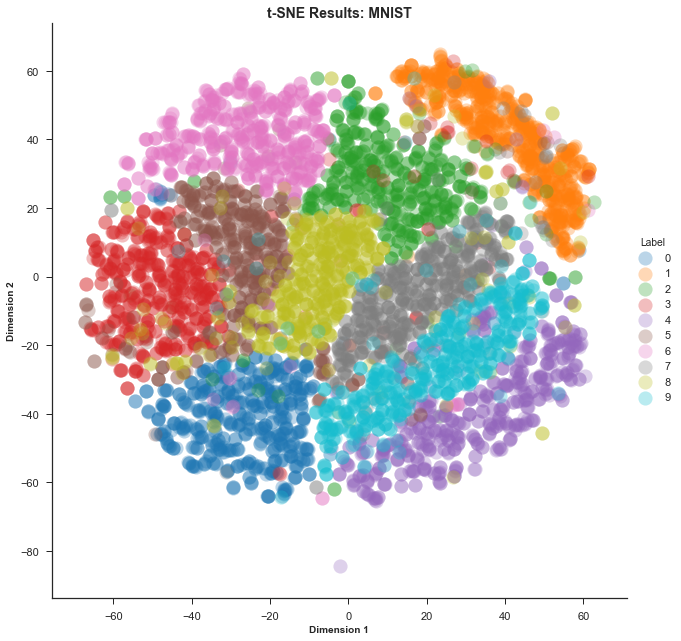

In [20]:
# Plot MNIST t-SNE
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='_DIM_1_',
           y='_DIM_2_',
           data=tsne_MNIST_out,
           fit_reg=False,
           legend=True,
           size=9,
           hue='Label',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('t-SNE Results: MNIST', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')

In [21]:
# Perform t-SNE on PCA Results: Digits
pca_tSNE_digits = conn.tSne(table='pca_digits',
                            inputs = ['Score1','Score2','Score3','Score4','Score5','Score6','Score7',
                                      'Score8','Score9','Score10','Score11','Score12','Score13','Score14',
                                      'Score15','Score16','Score17','Score18','Score19','Score20','Score21',
                                      'Score22','Score23','Score24','Score25','Score26','Score27','Score28',
                                      'Score29','Score30'],
                            nDimensions = 2,
                            maxIters = 1000,
                            perplexity = 100,
                            learningRate = 1000,
                            seed = 12345,
                            output= {'casout':{'name':'pca_tSNE_digits','replace':'TRUE'},
                                     'copyVars':['ID','Label']})

In [22]:
# Pandas Plotting Dataframe
pca_tSNE_digits_out = conn.fetch(table='pca_tSNE_digits', maxrows=len(digits), to=len(digits))
pca_tSNE_digits_out = pd.DataFrame(pca_tSNE_digits_out['Fetch'])

pca_tSNE_digits_out['Label'] = pca_tSNE_digits_out['Label'].astype(int) # Convert Label to Int

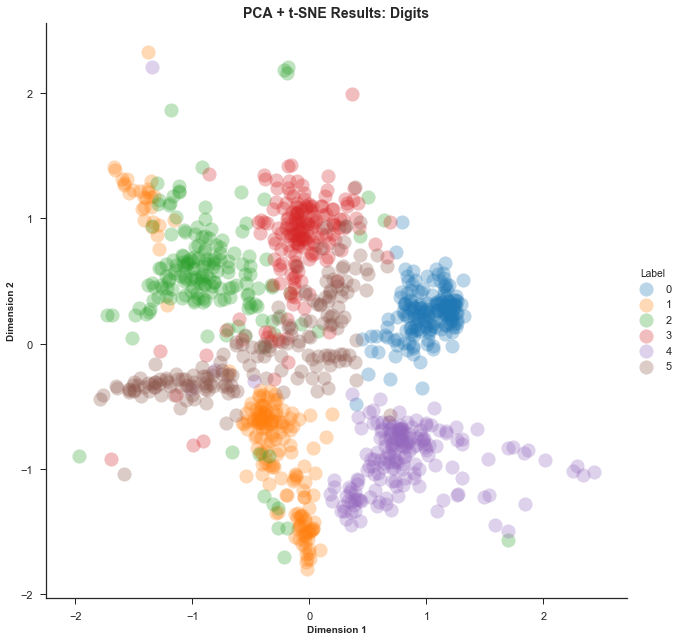

In [23]:
# Plot PCA + t-SNE: Digits
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='_DIM_1_',
           y='_DIM_2_',
           data=pca_tSNE_digits_out,
           fit_reg=False,
           legend=True,
           size=9,
           hue='Label',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('PCA + t-SNE Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')

In [24]:
# Perform t-SNE on PCA Results: MNIST
pca_tSNE_MNIST = conn.tSne(table='pca_mnist',
                           inputs = ['Score1','Score2','Score3','Score4','Score5','Score6','Score7',
                                     'Score8','Score9','Score10','Score11','Score12','Score13','Score14',
                                     'Score15','Score16','Score17','Score18','Score19','Score20','Score21',
                                     'Score22','Score23','Score24','Score25','Score26','Score27','Score28',
                                     'Score29','Score30'],
                           nDimensions = 2,
                           maxIters = 1000,
                           perplexity = 100,
                           learningRate = 1000,
                           seed = 24680,
                           output= {'casout':{'name':'pca_tSNE_MNIST','replace':'TRUE'},
                                    'copyVars':['ID','Label']})

In [25]:
# Pandas Plotting Dataframe
pca_tSNE_MNIST_out = conn.fetch(table='pca_tSNE_MNIST', maxrows=len(mnist_cas), to=len(mnist_cas))
pca_tSNE_MNIST_out = pd.DataFrame(pca_tSNE_MNIST_out['Fetch'])

pca_tSNE_MNIST_out['Label'] = pca_tSNE_MNIST_out['Label'].astype(int) # Convert Label to Int

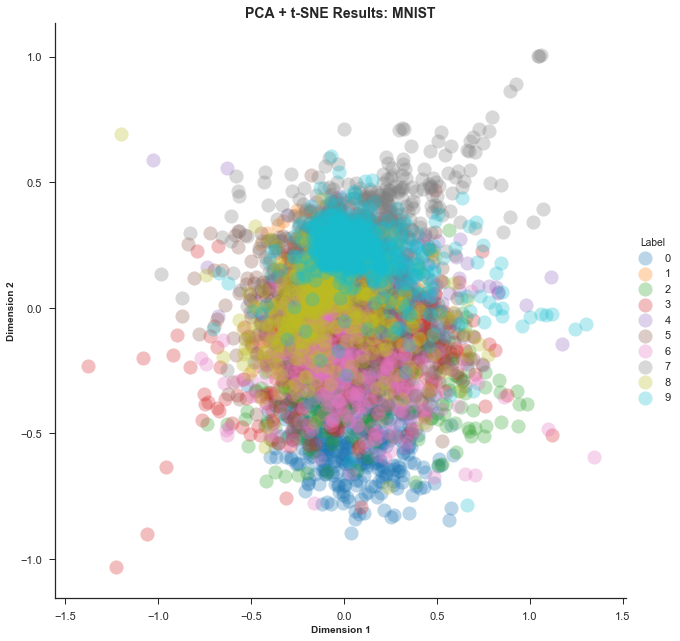

In [26]:
# Plot PCA + t-SNE: MNIST
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='_DIM_1_',
           y='_DIM_2_',
           data=pca_tSNE_MNIST_out,
           fit_reg=False,
           legend=True,
           size=9,
           hue='Label',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('PCA + t-SNE Results: MNIST', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')

In [27]:
# Close CAS Session
conn.shutdown()

+ Elapsed: 0.000666s, sys: 0.000994s, mem: 0.195mb